In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

url ='household_power_consumption.txt'
data = pd.read_csv(url, low_memory=False, sep=';')

data

Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                 0.000   
2075255  26/11/2010  20:59:00               0.944                 0.000   
2075256  26/11/2010  21:00:00               0.938                 0.000   
2075257  26/11/2010  21:01:00               0.934                 0.000   
2075258  26/11/2010  21:02:00               0.932                 0.000   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.400          0.000          1.000   
1        233.630           23.000          0.000          1.000   
2        233.290           23.000          0.000          2.000   
3        233.740           23.000          0.000          1.000   
4        235.680           15.800          0.000          1.000   
...          ...              ...            ...            ...   
2075254  240.430            4.000          0.000          0.000   
2075255  240.000            4.000          0.000          0.000   
2075256  239.820            3.800          0.000          0.000   
2075257  239.700            3.800          0.000          0.000   
2075258  239.550            3.800          0.000          0.000   

         Sub_metering_3  
0                  17.0  
1                  16.0  
2                  17.0  
3                  17.0  
4                  17.0  
...                 ...  
2075254             0.0  
2075255             0.0  
2075256             0.0  
2075257             0.0  
2075258             0.0  

[2075259 rows x 9 columns]

In [3]:
#número de registros y atributos
shape = data.shape
shape

(2075259, 9)

In [4]:
#tipo de datos
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

NOTA: Para poder seguir sacando las diferentes medidas entonces lo que haré es cambiarle el tipo de dato a cada atributo que es catalogado como categórico cuando realmente corresponde a un datos númericos.

In [5]:
dates = data['Date'] # Guardamos la columna Date.
times = data['Time'] #Guardamos la columna Time
data = data.drop('Date', 1) # Borramos la columna del dataframe.
data = data.drop('Time',1)

data

Global_active_power Global_reactive_power  Voltage Global_intensity  \
0                     4.216                 0.418  234.840           18.400   
1                     5.360                 0.436  233.630           23.000   
2                     5.374                 0.498  233.290           23.000   
3                     5.388                 0.502  233.740           23.000   
4                     3.666                 0.528  235.680           15.800   
...                     ...                   ...      ...              ...   
2075254               0.946                 0.000  240.430            4.000   
2075255               0.944                 0.000  240.000            4.000   
2075256               0.938                 0.000  239.820            3.800   
2075257               0.934                 0.000  239.700            3.800   
2075258               0.932                 0.000  239.550            3.800   

        Sub_metering_1 Sub_metering_2  Sub_metering_3  
0                0.000          1.000            17.0  
1                0.000          1.000            16.0  
2                0.000          2.000            17.0  
3                0.000          1.000            17.0  
4                0.000          1.000            17.0  
...                ...            ...             ...  
2075254          0.000          0.000             0.0  
2075255          0.000          0.000             0.0  
2075256          0.000          0.000             0.0  
2075257          0.000          0.000             0.0  
2075258          0.000          0.000             0.0  

[2075259 rows x 7 columns]

In [6]:
data = data.apply(pd.to_numeric, errors='coerce')
data

Global_active_power  Global_reactive_power  Voltage  \
0                      4.216                  0.418   234.84   
1                      5.360                  0.436   233.63   
2                      5.374                  0.498   233.29   
3                      5.388                  0.502   233.74   
4                      3.666                  0.528   235.68   
...                      ...                    ...      ...   
2075254                0.946                  0.000   240.43   
2075255                0.944                  0.000   240.00   
2075256                0.938                  0.000   239.82   
2075257                0.934                  0.000   239.70   
2075258                0.932                  0.000   239.55   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0                    18.4             0.0             1.0            17.0  
1                    23.0             0.0             1.0            16.0  
2                    23.0             0.0             2.0            17.0  
3                    23.0             0.0             1.0            17.0  
4                    15.8             0.0             1.0            17.0  
...                   ...             ...             ...             ...  
2075254               4.0             0.0             0.0             0.0  
2075255               4.0             0.0             0.0             0.0  
2075256               3.8             0.0             0.0             0.0  
2075257               3.8             0.0             0.0             0.0  
2075258               3.8             0.0             0.0             0.0  

[2075259 rows x 7 columns]

In [7]:
#Añadimos la columna de fecha
data.insert(0, 'Time', times)
data.insert(0, 'Date', dates)
data

Date      Time  Global_active_power  Global_reactive_power  \
0        16/12/2006  17:24:00                4.216                  0.418   
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
4        16/12/2006  17:28:00                3.666                  0.528   
...             ...       ...                  ...                    ...   
2075254  26/11/2010  20:58:00                0.946                  0.000   
2075255  26/11/2010  20:59:00                0.944                  0.000   
2075256  26/11/2010  21:00:00                0.938                  0.000   
2075257  26/11/2010  21:01:00                0.934                  0.000   
2075258  26/11/2010  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0         234.84              18.4             0.0             1.0   
1         233.63              23.0             0.0             1.0   
2         233.29              23.0             0.0             2.0   
3         233.74              23.0             0.0             1.0   
4         235.68              15.8             0.0             1.0   
...          ...               ...             ...             ...   
2075254   240.43               4.0             0.0             0.0   
2075255   240.00               4.0             0.0             0.0   
2075256   239.82               3.8             0.0             0.0   
2075257   239.70               3.8             0.0             0.0   
2075258   239.55               3.8             0.0             0.0   

         Sub_metering_3  
0                  17.0  
1                  16.0  
2                  17.0  
3                  17.0  
4                  17.0  
...                 ...  
2075254             0.0  
2075255             0.0  
2075256             0.0  
2075257             0.0  
2075258             0.0  

[2075259 rows x 9 columns]

In [8]:
data.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [9]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

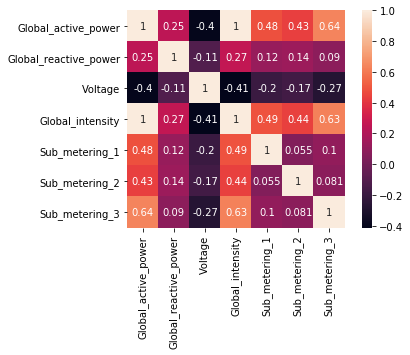

In [10]:
data.corr()
sns.heatmap(data.corr(), square=True, annot=True)

In [11]:
#Verificar la matriz de correlación 

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print('Las columnas que presentan una alta correlación son:', corr_matrix.columns[i], corr_matrix.columns[j])
    return dataset

data = correlation(data,0.90)

Las columnas que presentan una alta correlación son: Global_intensity Global_active_power


/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


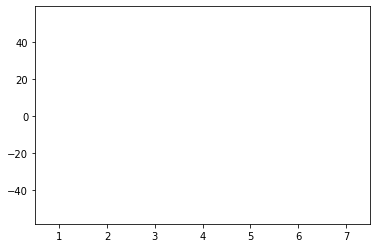

In [12]:
#Diagrama de cajas y bigotes para atributos numéricos

plt.boxplot((data['Global_active_power'],data['Global_reactive_power'],data['Voltage'],data['Global_intensity'],data['Sub_metering_1'], data['Sub_metering_2'],data['Sub_metering_3'] ))
plt.show()
 

In [13]:
#Moda
data.mode()

Date      Time  Global_active_power  Global_reactive_power  \
0      1/1/2007  17:24:00                0.218                    0.0   
1      1/1/2008  17:25:00                  NaN                    NaN   
2      1/1/2009  17:26:00                  NaN                    NaN   
3      1/1/2010  17:27:00                  NaN                    NaN   
4     1/10/2007  17:28:00                  NaN                    NaN   
...         ...       ...                  ...                    ...   
1435   9/8/2010       NaN                  NaN                    NaN   
1436   9/9/2007       NaN                  NaN                    NaN   
1437   9/9/2008       NaN                  NaN                    NaN   
1438   9/9/2009       NaN                  NaN                    NaN   
1439   9/9/2010       NaN                  NaN                    NaN   

      Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0      241.18               1.0             0.0             0.0   
1         NaN               NaN             NaN             NaN   
2         NaN               NaN             NaN             NaN   
3         NaN               NaN             NaN             NaN   
4         NaN               NaN             NaN             NaN   
...       ...               ...             ...             ...   
1435      NaN               NaN             NaN             NaN   
1436      NaN               NaN             NaN             NaN   
1437      NaN               NaN             NaN             NaN   
1438      NaN               NaN             NaN             NaN   
1439      NaN               NaN             NaN             NaN   

      Sub_metering_3  
0                0.0  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
1435             NaN  
1436             NaN  
1437             NaN  
1438             NaN  
1439             NaN  

[1440 rows x 9 columns]

In [14]:
# Cual es el máximo de datos faltantes en un mismo registro?
max(data.isnull().sum(axis=1))

7

In [15]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


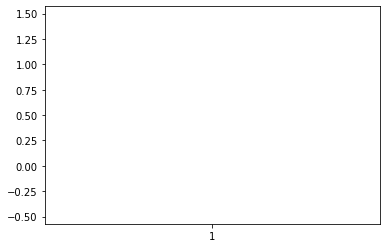

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


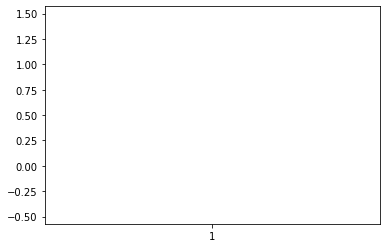

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


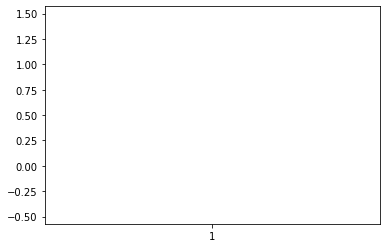

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


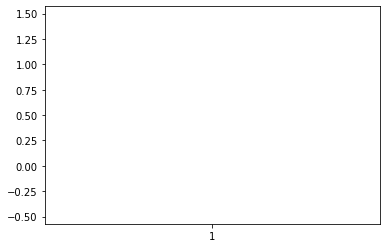

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


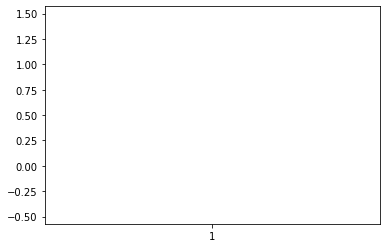

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


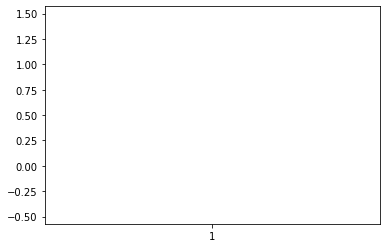

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


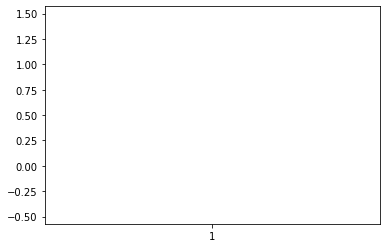

In [16]:
#En qué atributos hay datos atípicos?

plt.boxplot((data['Global_active_power']))
plt.show()
plt.boxplot((data['Global_reactive_power']))
plt.show()
plt.boxplot((data['Voltage']))
plt.show()
plt.boxplot((data['Global_intensity']))
plt.show()
plt.boxplot((data['Sub_metering_1']))
plt.show()
plt.boxplot((data['Sub_metering_2']))
plt.show()
plt.boxplot((data['Sub_metering_3']))
plt.show()

In [17]:
#Decidí en dividir el tiempo en 3 columnas de tal forma que haya una que tenga la hora, otra los minutos y 
#otra los segundos.
#Decidí en dividir la fecha en 3 columnas de tal forma que haya una que tenga el día, otra el mes y otra el año.

data['Horas'], data['Segundos'], data['Milisegundos'] = data['Time'].str.split(':', 2).str
data['Día'], data['Mes'], data['Año'] = data['Date'].str.split('/',2).str
data


/home/katherine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """
/home/katherine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


Date      Time  Global_active_power  Global_reactive_power  \
0        16/12/2006  17:24:00                4.216                  0.418   
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
4        16/12/2006  17:28:00                3.666                  0.528   
...             ...       ...                  ...                    ...   
2075254  26/11/2010  20:58:00                0.946                  0.000   
2075255  26/11/2010  20:59:00                0.944                  0.000   
2075256  26/11/2010  21:00:00                0.938                  0.000   
2075257  26/11/2010  21:01:00                0.934                  0.000   
2075258  26/11/2010  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0         234.84              18.4             0.0             1.0   
1         233.63              23.0             0.0             1.0   
2         233.29              23.0             0.0             2.0   
3         233.74              23.0             0.0             1.0   
4         235.68              15.8             0.0             1.0   
...          ...               ...             ...             ...   
2075254   240.43               4.0             0.0             0.0   
2075255   240.00               4.0             0.0             0.0   
2075256   239.82               3.8             0.0             0.0   
2075257   239.70               3.8             0.0             0.0   
2075258   239.55               3.8             0.0             0.0   

         Sub_metering_3 Horas Segundos Milisegundos Día Mes   Año  
0                  17.0    17       24           00  16  12  2006  
1                  16.0    17       25           00  16  12  2006  
2                  17.0    17       26           00  16  12  2006  
3                  17.0    17       27           00  16  12  2006  
4                  17.0    17       28           00  16  12  2006  
...                 ...   ...      ...          ...  ..  ..   ...  
2075254             0.0    20       58           00  26  11  2010  
2075255             0.0    20       59           00  26  11  2010  
2075256             0.0    21       00           00  26  11  2010  
2075257             0.0    21       01           00  26  11  2010  
2075258             0.0    21       02           00  26  11  2010  

[2075259 rows x 15 columns]

In [18]:
#Borramos las columnas divididas del dataframe.
data = data.drop('Date', 1)
data = data.drop('Time',1)
data

Global_active_power  Global_reactive_power  Voltage  \
0                      4.216                  0.418   234.84   
1                      5.360                  0.436   233.63   
2                      5.374                  0.498   233.29   
3                      5.388                  0.502   233.74   
4                      3.666                  0.528   235.68   
...                      ...                    ...      ...   
2075254                0.946                  0.000   240.43   
2075255                0.944                  0.000   240.00   
2075256                0.938                  0.000   239.82   
2075257                0.934                  0.000   239.70   
2075258                0.932                  0.000   239.55   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0                    18.4             0.0             1.0            17.0   
1                    23.0             0.0             1.0            16.0   
2                    23.0             0.0             2.0            17.0   
3                    23.0             0.0             1.0            17.0   
4                    15.8             0.0             1.0            17.0   
...                   ...             ...             ...             ...   
2075254               4.0             0.0             0.0             0.0   
2075255               4.0             0.0             0.0             0.0   
2075256               3.8             0.0             0.0             0.0   
2075257               3.8             0.0             0.0             0.0   
2075258               3.8             0.0             0.0             0.0   

        Horas Segundos Milisegundos Día Mes   Año  
0          17       24           00  16  12  2006  
1          17       25           00  16  12  2006  
2          17       26           00  16  12  2006  
3          17       27           00  16  12  2006  
4          17       28           00  16  12  2006  
...       ...      ...          ...  ..  ..   ...  
2075254    20       58           00  26  11  2010  
2075255    20       59           00  26  11  2010  
2075256    21       00           00  26  11  2010  
2075257    21       01           00  26  11  2010  
2075258    21       02           00  26  11  2010  

[2075259 rows x 13 columns]

In [19]:
data.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Horas                     object
Segundos                  object
Milisegundos              object
Día                       object
Mes                       object
Año                       object
dtype: object

In [20]:
data = data.apply(pd.to_numeric, errors='coerce')
data

Global_active_power  Global_reactive_power  Voltage  \
0                      4.216                  0.418   234.84   
1                      5.360                  0.436   233.63   
2                      5.374                  0.498   233.29   
3                      5.388                  0.502   233.74   
4                      3.666                  0.528   235.68   
...                      ...                    ...      ...   
2075254                0.946                  0.000   240.43   
2075255                0.944                  0.000   240.00   
2075256                0.938                  0.000   239.82   
2075257                0.934                  0.000   239.70   
2075258                0.932                  0.000   239.55   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0                    18.4             0.0             1.0            17.0   
1                    23.0             0.0             1.0            16.0   
2                    23.0             0.0             2.0            17.0   
3                    23.0             0.0             1.0            17.0   
4                    15.8             0.0             1.0            17.0   
...                   ...             ...             ...             ...   
2075254               4.0             0.0             0.0             0.0   
2075255               4.0             0.0             0.0             0.0   
2075256               3.8             0.0             0.0             0.0   
2075257               3.8             0.0             0.0             0.0   
2075258               3.8             0.0             0.0             0.0   

         Horas  Segundos  Milisegundos  Día  Mes   Año  
0           17        24             0   16   12  2006  
1           17        25             0   16   12  2006  
2           17        26             0   16   12  2006  
3           17        27             0   16   12  2006  
4           17        28             0   16   12  2006  
...        ...       ...           ...  ...  ...   ...  
2075254     20        58             0   26   11  2010  
2075255     20        59             0   26   11  2010  
2075256     21         0             0   26   11  2010  
2075257     21         1             0   26   11  2010  
2075258     21         2             0   26   11  2010  

[2075259 rows x 13 columns]

In [21]:
data.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Horas                      int64
Segundos                   int64
Milisegundos               int64
Día                        int64
Mes                        int64
Año                        int64
dtype: object

In [22]:
#Las columnas que presentan una alta correlación son: Global_intensity Global_active_power, por lo tanto eliminaré Global_intensity. 
#La correlación que presentaron fue de 1.

data = data.drop('Global_intensity',1)
data

Global_active_power  Global_reactive_power  Voltage  Sub_metering_1  \
0                      4.216                  0.418   234.84             0.0   
1                      5.360                  0.436   233.63             0.0   
2                      5.374                  0.498   233.29             0.0   
3                      5.388                  0.502   233.74             0.0   
4                      3.666                  0.528   235.68             0.0   
...                      ...                    ...      ...             ...   
2075254                0.946                  0.000   240.43             0.0   
2075255                0.944                  0.000   240.00             0.0   
2075256                0.938                  0.000   239.82             0.0   
2075257                0.934                  0.000   239.70             0.0   
2075258                0.932                  0.000   239.55             0.0   

         Sub_metering_2  Sub_metering_3  Horas  Segundos  Milisegundos  Día  \
0                   1.0            17.0     17        24             0   16   
1                   1.0            16.0     17        25             0   16   
2                   2.0            17.0     17        26             0   16   
3                   1.0            17.0     17        27             0   16   
4                   1.0            17.0     17        28             0   16   
...                 ...             ...    ...       ...           ...  ...   
2075254             0.0             0.0     20        58             0   26   
2075255             0.0             0.0     20        59             0   26   
2075256             0.0             0.0     21         0             0   26   
2075257             0.0             0.0     21         1             0   26   
2075258             0.0             0.0     21         2             0   26   

         Mes   Año  
0         12  2006  
1         12  2006  
2         12  2006  
3         12  2006  
4         12  2006  
...      ...   ...  
2075254   11  2010  
2075255   11  2010  
2075256   11  2010  
2075257   11  2010  
2075258   11  2010  

[2075259 rows x 12 columns]

In [23]:
#Eliminar los registros que tengan más de dos datos faltantes.
data.dropna(axis = 0, thresh = 10)
data.shape

(2075259, 12)

In [24]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Horas                        0
Segundos                     0
Milisegundos                 0
Día                          0
Mes                          0
Año                          0
dtype: int64

In [25]:
#Para todos los atributos númericos que tengan datos faltantes los reemplazaré por la moda.

data.Global_active_power.fillna(data.Global_active_power.mode()[0], inplace=True)
data.Global_reactive_power.fillna(data.Global_reactive_power.mode()[0], inplace=True)
data.Voltage.fillna(data.Voltage.mode()[0], inplace=True)
data.Sub_metering_1.fillna(data.Sub_metering_1.mode()[0], inplace=True)
data.Sub_metering_2.fillna(data.Sub_metering_2.mode()[0], inplace=True)
data.Sub_metering_3.fillna(data.Sub_metering_3.mode()[0], inplace=True)

data

Global_active_power  Global_reactive_power  Voltage  Sub_metering_1  \
0                      4.216                  0.418   234.84             0.0   
1                      5.360                  0.436   233.63             0.0   
2                      5.374                  0.498   233.29             0.0   
3                      5.388                  0.502   233.74             0.0   
4                      3.666                  0.528   235.68             0.0   
...                      ...                    ...      ...             ...   
2075254                0.946                  0.000   240.43             0.0   
2075255                0.944                  0.000   240.00             0.0   
2075256                0.938                  0.000   239.82             0.0   
2075257                0.934                  0.000   239.70             0.0   
2075258                0.932                  0.000   239.55             0.0   

         Sub_metering_2  Sub_metering_3  Horas  Segundos  Milisegundos  Día  \
0                   1.0            17.0     17        24             0   16   
1                   1.0            16.0     17        25             0   16   
2                   2.0            17.0     17        26             0   16   
3                   1.0            17.0     17        27             0   16   
4                   1.0            17.0     17        28             0   16   
...                 ...             ...    ...       ...           ...  ...   
2075254             0.0             0.0     20        58             0   26   
2075255             0.0             0.0     20        59             0   26   
2075256             0.0             0.0     21         0             0   26   
2075257             0.0             0.0     21         1             0   26   
2075258             0.0             0.0     21         2             0   26   

         Mes   Año  
0         12  2006  
1         12  2006  
2         12  2006  
3         12  2006  
4         12  2006  
...      ...   ...  
2075254   11  2010  
2075255   11  2010  
2075256   11  2010  
2075257   11  2010  
2075258   11  2010  

[2075259 rows x 12 columns]

In [27]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Horas                    0
Segundos                 0
Milisegundos             0
Día                      0
Mes                      0
Año                      0
dtype: int64

In [28]:
#Normalizar los datos, pienso que es necesario ya que que todas las técnicas forman los grupos a partir de
#distancias, por lo tanto es conveniente que los datos se encuentren a escalas similares.

data['Global_active_power'] = preprocessing.scale(data['Global_active_power'])
data['Global_reactive_power'] = preprocessing.scale(data['Global_reactive_power'])
data['Voltage'] = preprocessing.scale(data['Voltage'])
data['Sub_metering_1'] = preprocessing.scale(data['Sub_metering_1'])
data['Sub_metering_2'] = preprocessing.scale(data['Sub_metering_2'])
data['Sub_metering_3'] = preprocessing.scale(data['Sub_metering_3'])
#data['Horas'] = preprocessing.scale(data['Horas'])
#data['Segundos'] = preprocessing.scale(data['Segundos'])
#data['Milisegundos'] = preprocessing.scale(data['Milisegundos'])
#data['Día'] = preprocessing.scale(data['Día'])
#data['Mes'] = preprocessing.scale(data['Mes'])
#data['Año'] = preprocessing.scale(data['Año'])

data

Global_active_power  Global_reactive_power   Voltage  Sub_metering_1  \
0                   2.971487               2.621353 -1.864711       -0.181154   
1                   4.055708               2.780849 -2.240503       -0.181154   
2                   4.068976               3.330224 -2.346098       -0.181154   
3                   4.082245               3.365667 -2.206340       -0.181154   
4                   2.450227               3.596050 -1.603830       -0.181154   
...                      ...                    ...       ...             ...   
2075254            -0.127641              -1.082497 -0.128613       -0.181154   
2075255            -0.129537              -1.082497 -0.262159       -0.181154   
2075256            -0.135223              -1.082497 -0.318062       -0.181154   
2075257            -0.139014              -1.082497 -0.355331       -0.181154   
2075258            -0.140910              -1.082497 -0.401916       -0.181154   

         Sub_metering_2  Sub_metering_3  Horas  Segundos  Milisegundos  Día  \
0             -0.048773        1.262337     17        24             0   16   
1             -0.048773        1.143500     17        25             0   16   
2              0.124020        1.262337     17        26             0   16   
3             -0.048773        1.262337     17        27             0   16   
4             -0.048773        1.262337     17        28             0   16   
...                 ...             ...    ...       ...           ...  ...   
2075254       -0.221566       -0.757896     20        58             0   26   
2075255       -0.221566       -0.757896     20        59             0   26   
2075256       -0.221566       -0.757896     21         0             0   26   
2075257       -0.221566       -0.757896     21         1             0   26   
2075258       -0.221566       -0.757896     21         2             0   26   

         Mes   Año  
0         12  2006  
1         12  2006  
2         12  2006  
3         12  2006  
4         12  2006  
...      ...   ...  
2075254   11  2010  
2075255   11  2010  
2075256   11  2010  
2075257   11  2010  
2075258   11  2010  

[2075259 rows x 12 columns]

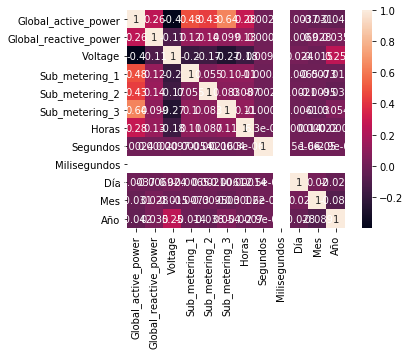

In [29]:
#Volver a calcular la correlación entre los atributos de entrada
#para definir si se debe eliminar algún otro atributo.

data.corr()
sns.heatmap(data.corr(), square=True, annot=True)


In [30]:
#Verificar la matriz de correlación 

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print('Las columnas que presentan una alta correlación son:', corr_matrix.columns[i], corr_matrix.columns[j])
    return dataset

data = correlation(data,0.90)

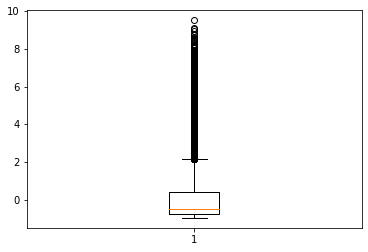

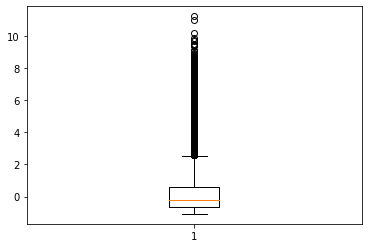

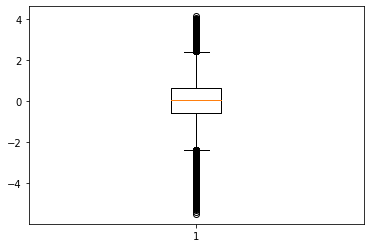

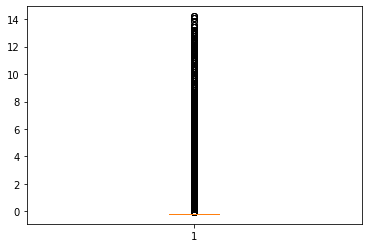

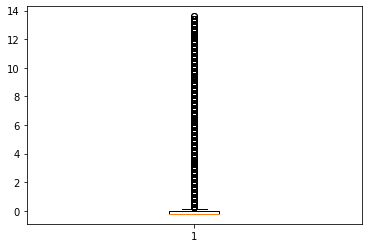

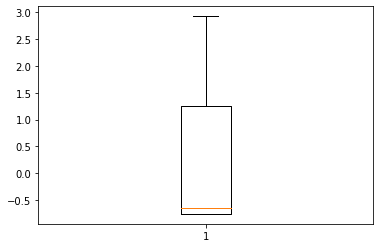

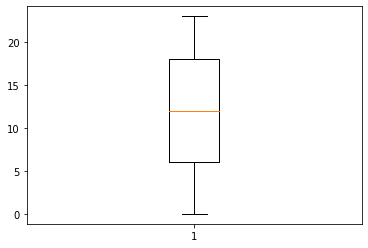

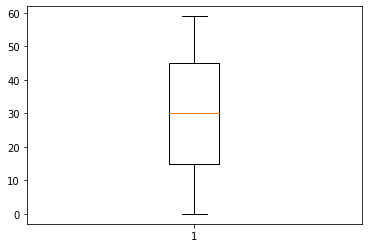

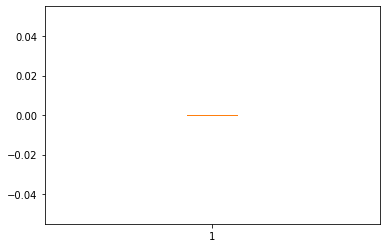

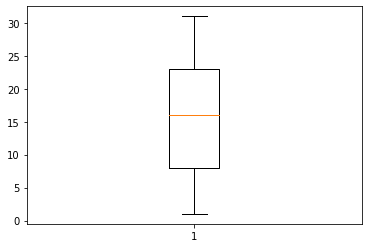

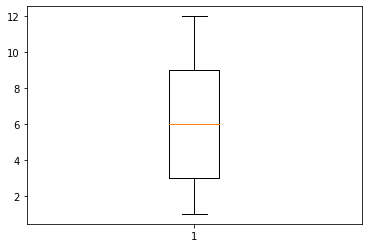

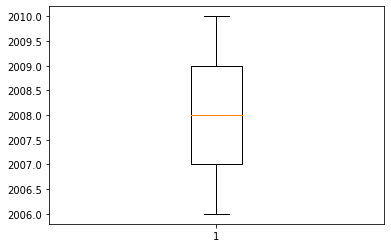

In [32]:
#Volver a calcular los atributos atípicos para visualizarlos y tenerlos en cuenta
#En qué atributos hay datos atípicos? ahora sí ya se pudieron visualizar porque no tienen atributos faltantes

plt.boxplot((data['Global_active_power']))
plt.show()
plt.boxplot((data['Global_reactive_power']))
plt.show()
plt.boxplot((data['Voltage']))
plt.show()
plt.boxplot((data['Sub_metering_1']))
plt.show()
plt.boxplot((data['Sub_metering_2']))
plt.show()
plt.boxplot((data['Sub_metering_3']))
plt.show()
plt.boxplot((data['Horas']))
plt.show()
plt.boxplot((data['Segundos']))
plt.show()
plt.boxplot((data['Milisegundos']))
plt.show()
plt.boxplot((data['Día']))
plt.show()
plt.boxplot((data['Mes']))
plt.show()
plt.boxplot((data['Año']))
plt.show()




In [33]:


#Eliminar una cantidad de registros para poder utilizar todas las técnicas
data.drop([x for x in range(3000,1995000)], inplace=True)
data.drop([x for x in range(2000000,2075259)], inplace=True)

data



Global_active_power  Global_reactive_power   Voltage  Sub_metering_1  \
0                   2.971487               2.621353 -1.864711       -0.181154   
1                   4.055708               2.780849 -2.240503       -0.181154   
2                   4.068976               3.330224 -2.346098       -0.181154   
3                   4.082245               3.365667 -2.206340       -0.181154   
4                   2.450227               3.596050 -1.603830       -0.181154   
...                      ...                    ...       ...             ...   
1999995             0.522512               0.122584 -0.023018       -0.181154   
1999996             0.480811              -0.054634 -0.917466       -0.181154   
1999997             0.490289              -0.036912 -0.737334       -0.181154   
1999998             0.509244               0.016253 -0.128613       -0.181154   
1999999             0.505453               0.016253 -0.243525       -0.181154   

         Sub_metering_2  Sub_metering_3  Horas  Segundos  Milisegundos  Día  \
0             -0.048773        1.262337     17        24             0   16   
1             -0.048773        1.143500     17        25             0   16   
2              0.124020        1.262337     17        26             0   16   
3             -0.048773        1.262337     17        27             0   16   
4             -0.048773        1.262337     17        28             0   16   
...                 ...             ...    ...       ...           ...  ...   
1999995       -0.048773        1.500012     14        39             0    5   
1999996        0.124020        1.381174     14        40             0    5   
1999997       -0.048773        1.381174     14        41             0    5   
1999998       -0.048773        1.381174     14        42             0    5   
1999999       -0.048773        1.381174     14        43             0    5   

         Mes   Año  
0         12  2006  
1         12  2006  
2         12  2006  
3         12  2006  
4         12  2006  
...      ...   ...  
1999995   10  2010  
1999996   10  2010  
1999997   10  2010  
1999998   10  2010  
1999999   10  2010  

[8000 rows x 12 columns]

In [34]:
#Este método tiene baja tolerancia a los datos atípicos, por lo tanto es justo y necesario eliminarlos antes de 
#ejecutar el método, pues sin estos los centroides pueden quedar mejor ubicados.

#------------------------------------------------------------------------------ 
# accept a dataframe, remove outliers, return cleaned data in a new dataframe 

#------------------------------------------------------------------------------ 
def remove_outlier(df_in, col_name): 
    q1 = df_in[col_name].quantile(0.25) 
    q3 = df_in[col_name].quantile(0.75) 
    iqr = q3-q1 #Interquartile range 
    fence_low = q1-1.5*iqr 
    fence_high = q3+1.5*iqr 
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)] 
    return df_out 


data = remove_outlier(data,'Global_active_power')
data = remove_outlier(data,'Global_reactive_power')
data = remove_outlier(data,'Voltage')
#dataNuevo = remove_outlier(dataNuevo,'Sub_metering_1')
#dataNuevo = remove_outlier(dataNuevo,'Sub_metering_2')


data

Global_active_power  Global_reactive_power   Voltage  Sub_metering_1  \
15                  2.182963               1.416273 -1.150395       -0.181154   
16                  2.074920               0.264358 -1.277730       -0.181154   
17                  2.226559               0.299801 -1.175241       -0.181154   
18                  2.071129              -1.082497 -1.153501       -0.181154   
19                  2.508987              -1.082497 -1.554139       -0.181154   
...                      ...                    ...       ...             ...   
1999995             0.522512               0.122584 -0.023018       -0.181154   
1999996             0.480811              -0.054634 -0.917466       -0.181154   
1999997             0.490289              -0.036912 -0.737334       -0.181154   
1999998             0.509244               0.016253 -0.128613       -0.181154   
1999999             0.505453               0.016253 -0.243525       -0.181154   

         Sub_metering_2  Sub_metering_3  Horas  Segundos  Milisegundos  Día  \
15            -0.221566        1.262337     17        39             0   16   
16            -0.221566        1.262337     17        40             0   16   
17            -0.221566        1.262337     17        41             0   16   
18            -0.221566        1.381174     17        42             0   16   
19            -0.221566        1.262337     17        43             0   16   
...                 ...             ...    ...       ...           ...  ...   
1999995       -0.048773        1.500012     14        39             0    5   
1999996        0.124020        1.381174     14        40             0    5   
1999997       -0.048773        1.381174     14        41             0    5   
1999998       -0.048773        1.381174     14        42             0    5   
1999999       -0.048773        1.381174     14        43             0    5   

         Mes   Año  
15        12  2006  
16        12  2006  
17        12  2006  
18        12  2006  
19        12  2006  
...      ...   ...  
1999995   10  2010  
1999996   10  2010  
1999997   10  2010  
1999998   10  2010  
1999999   10  2010  

[7493 rows x 12 columns]

/home/katherine/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


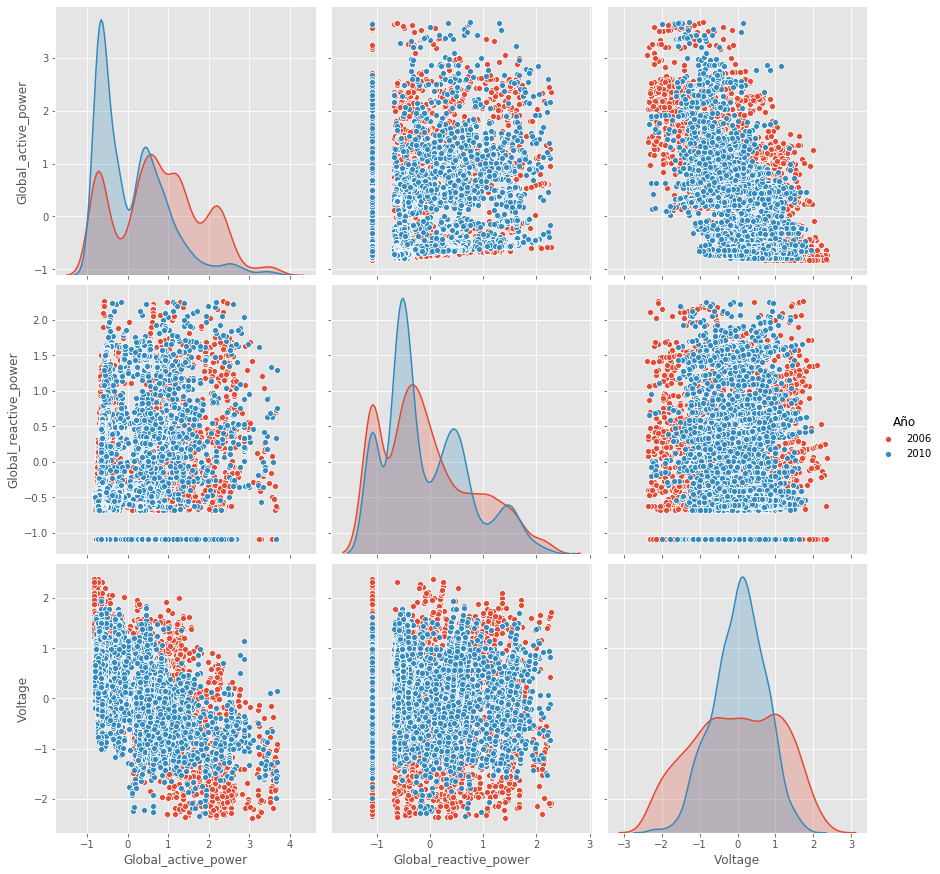

In [35]:

#Carga de librerías.

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
#conocer los datos para ver si se puede ver alguna agrupación, decidí diferenciarlos respecto al año para ver si 
#Se puede ver algún tipo de agrupamiento

#Decidí usar los 3 primeros atributos para poder diferenciar bien, porque con más atributos(dimensiones) era mucho
#más difícil, así que escogí las que me parecieron relevantes.

sb.pairplot(data.dropna(), hue='Año',size=4,vars=["Global_active_power","Global_reactive_power","Voltage"],kind='scatter')



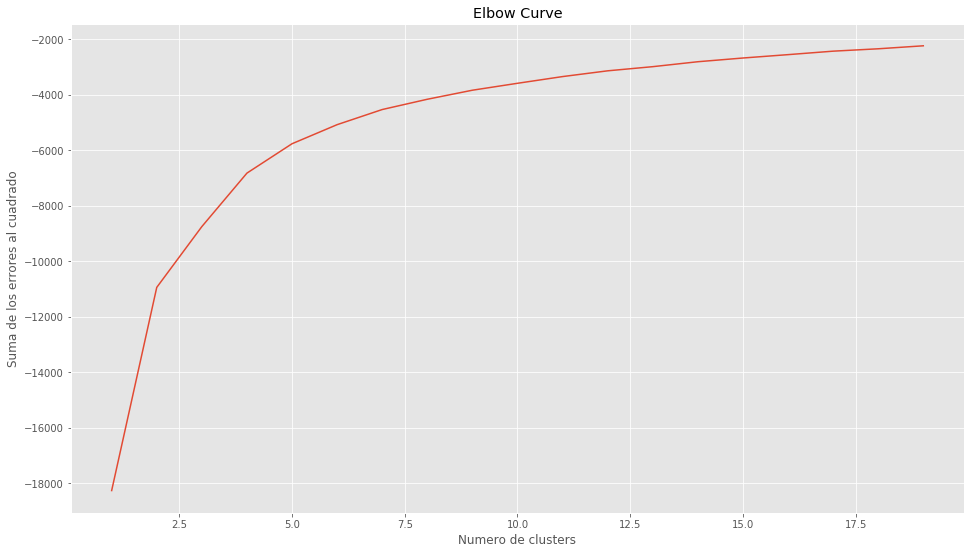

In [36]:
#En primera instancia calculamos el valor k, que me indica el número de clusters

X = np.array(data[["Global_active_power","Global_reactive_power","Voltage"]])


numeroIterar = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in numeroIterar]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

plt.plot(numeroIterar,score)
plt.xlabel('Numero de clusters')
plt.ylabel('Suma de los errores al cuadrado')
plt.title('Elbow Curve')
plt.show()


In [37]:
#Entonces con respecto a la gráfica considero que el numero de clusters es 4
#TÉCNICA DE K-MEDIAS
# Aplicación de k-means con k = 4.


kmeans = KMeans(n_clusters=4, init='k-means++').fit(X)
centroids = kmeans.cluster_centers_
#coordenadas de los 4 centroides
print(centroids)

[[ 1.87389506  0.44602224 -1.12665503]
 [-0.54050423 -0.56404495  0.68207024]
 [ 0.6669214  -0.5056957  -0.21063239]
 [-0.05576894  0.91478923  0.40006598]]


In [38]:
# Etiquetamos nuestro dataframe.
labels = kmeans.predict(X)
data['label'] = labels
data

Global_active_power  Global_reactive_power   Voltage  Sub_metering_1  \
15                  2.182963               1.416273 -1.150395       -0.181154   
16                  2.074920               0.264358 -1.277730       -0.181154   
17                  2.226559               0.299801 -1.175241       -0.181154   
18                  2.071129              -1.082497 -1.153501       -0.181154   
19                  2.508987              -1.082497 -1.554139       -0.181154   
...                      ...                    ...       ...             ...   
1999995             0.522512               0.122584 -0.023018       -0.181154   
1999996             0.480811              -0.054634 -0.917466       -0.181154   
1999997             0.490289              -0.036912 -0.737334       -0.181154   
1999998             0.509244               0.016253 -0.128613       -0.181154   
1999999             0.505453               0.016253 -0.243525       -0.181154   

         Sub_metering_2  Sub_metering_3  Horas  Segundos  Milisegundos  Día  \
15            -0.221566        1.262337     17        39             0   16   
16            -0.221566        1.262337     17        40             0   16   
17            -0.221566        1.262337     17        41             0   16   
18            -0.221566        1.381174     17        42             0   16   
19            -0.221566        1.262337     17        43             0   16   
...                 ...             ...    ...       ...           ...  ...   
1999995       -0.048773        1.500012     14        39             0    5   
1999996        0.124020        1.381174     14        40             0    5   
1999997       -0.048773        1.381174     14        41             0    5   
1999998       -0.048773        1.381174     14        42             0    5   
1999999       -0.048773        1.381174     14        43             0    5   

         Mes   Año  label  
15        12  2006      0  
16        12  2006      0  
17        12  2006      0  
18        12  2006      0  
19        12  2006      0  
...      ...   ...    ...  
1999995   10  2010      2  
1999996   10  2010      2  
1999997   10  2010      2  
1999998   10  2010      2  
1999999   10  2010      2  

[7493 rows x 13 columns]

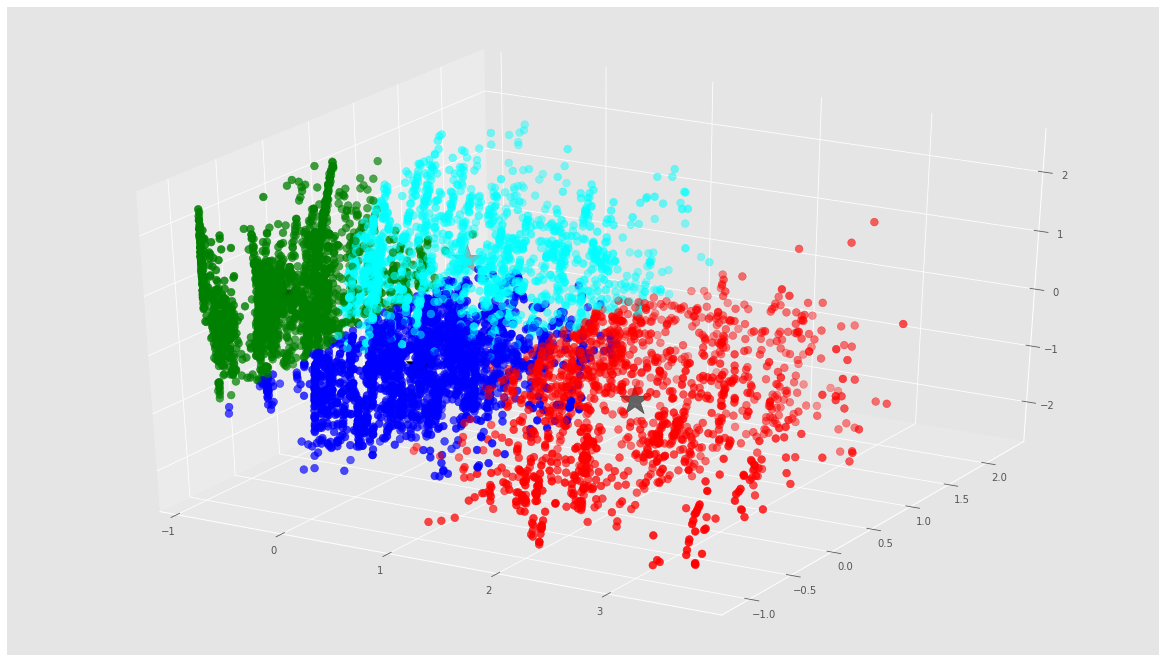

In [39]:
# Getting the cluster centers
C = kmeans.cluster_centers_
#print(C)
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='black', s=1000)






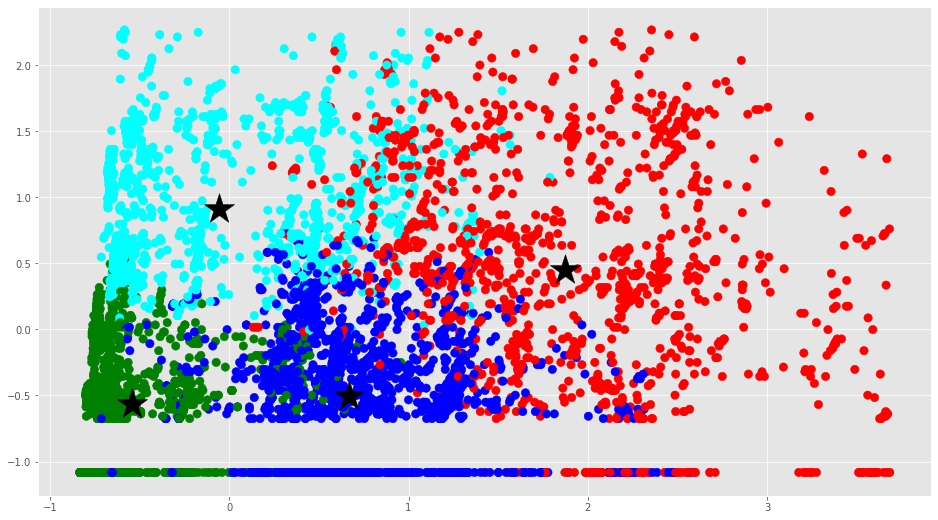

In [40]:

f1 = data['Global_active_power'].values
f2 = data['Global_reactive_power'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c='black', s=1000)
plt.show()

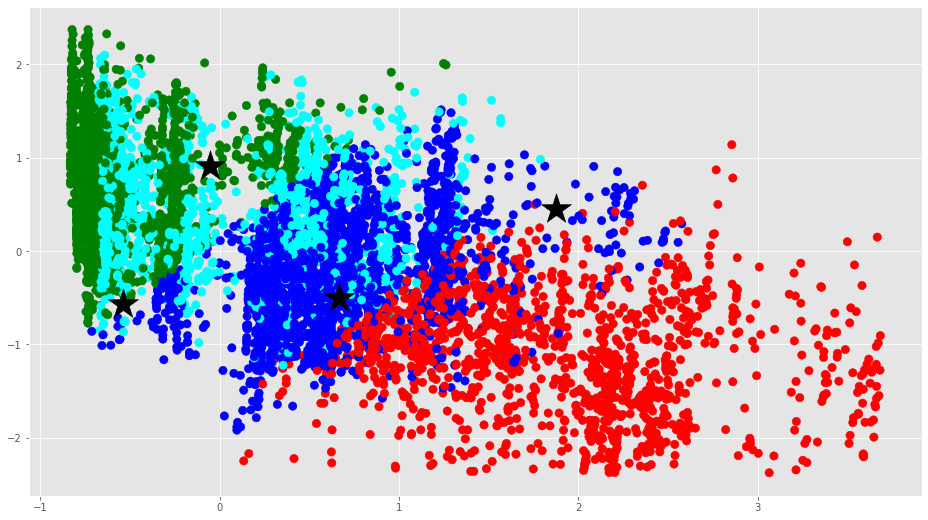

In [41]:
f1 = data['Global_active_power'].values
f2 = data['Voltage'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c='black', s=1000)
plt.show()

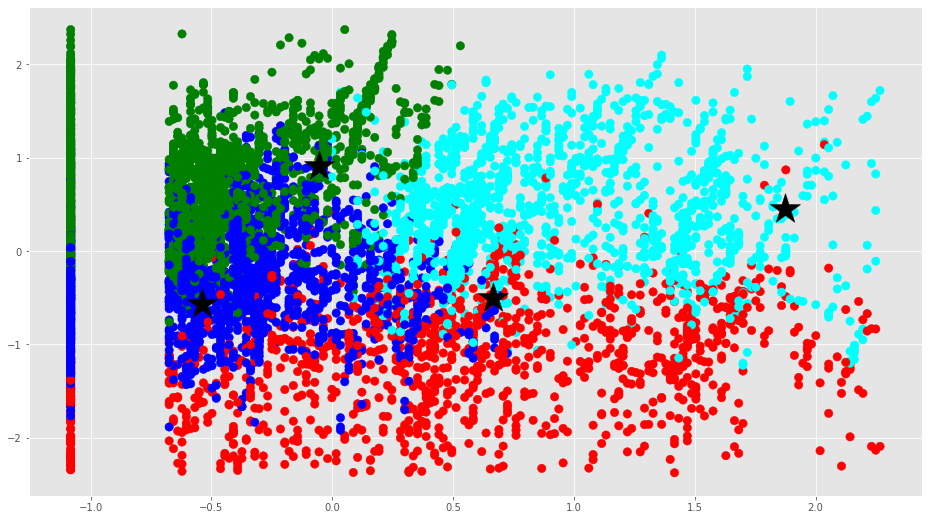

In [42]:
f1 = data['Global_reactive_power'].values
f2 = data['Voltage'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c='black', s=1000)
plt.show()

/home/katherine/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


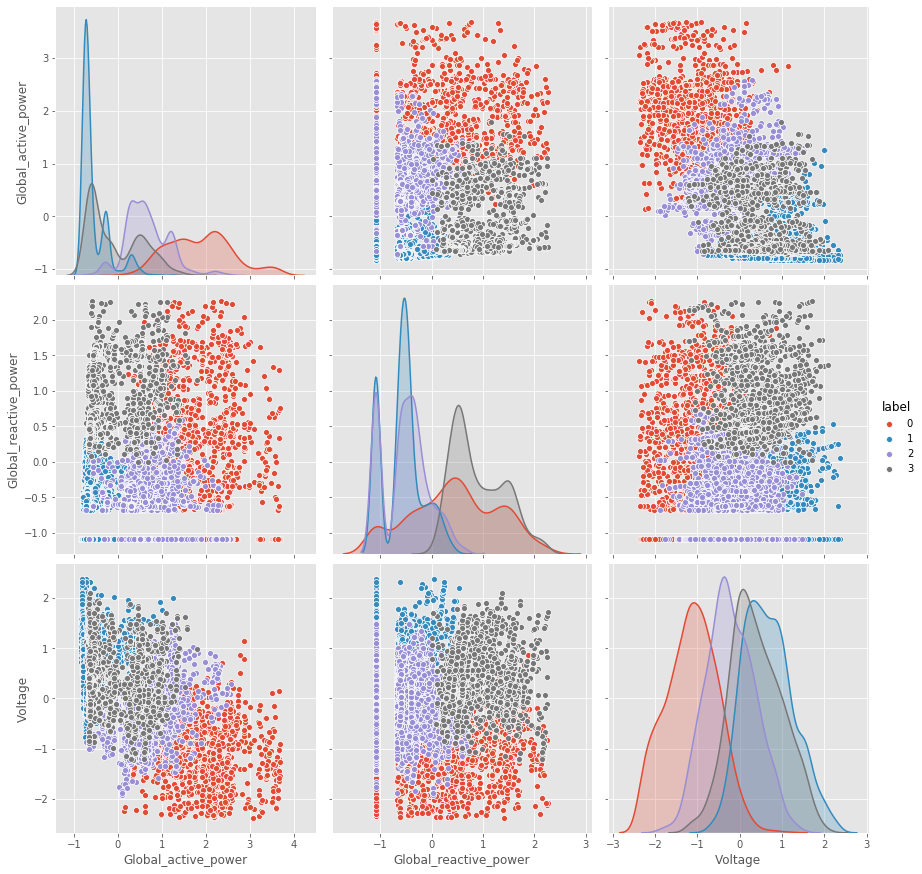

In [43]:
sb.pairplot(data.dropna(), hue='label',size=4,vars=["Global_active_power","Global_reactive_power","Voltage"],kind='scatter')

In [44]:
data.groupby(['label'])['label'].count()

label
0    1354
1    2311
2    2291
3    1537
Name: label, dtype: int64

In [45]:
data.groupby(['label','Año','Mes'])['label'].count()

label  Año   Mes
0      2006  12      778
       2010  10      576
1      2006  12      582
       2010  10     1729
2      2006  12      981
       2010  10     1310
3      2006  12      390
       2010  10     1147
Name: label, dtype: int64

In [46]:
caracteristicas = data.groupby(['label'])["Global_active_power","Global_reactive_power","Voltage", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Horas", "Día", "Mes" ,"Año"].mean()
caracteristicas

/home/katherine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Global_active_power  Global_reactive_power   Voltage  Sub_metering_1  \
label                                                                         
0                 1.871461               0.447491 -1.125928        0.814183   
1                -0.540412              -0.564785  0.682191       -0.176484   
2                 0.666967              -0.505135 -0.210415       -0.084516   
3                -0.058698               0.913687  0.402663       -0.148068   

       Sub_metering_2  Sub_metering_3      Horas        Día        Mes  \
label                                                                    
0            0.324378        1.066879  14.851551  11.207533  11.149188   
1           -0.167882       -0.567222   8.566854   6.985720  10.503678   
2           -0.120576        0.764580  11.758621   9.441729  10.856395   
3           -0.075755       -0.054847  10.326610   6.839948  10.507482   

               Año  
label               
0      2007.701625  
1      2008.992644  
2      2008.287211  
3      2008.985036

In [47]:
#MÉTODO JERÁRQUICO
#Este método con ayuda del dendograma finalmente me mostrará en lo diferentes niveles
#una cantidad distinta de clusters por lo tanto no es necesario pasarle el número
#sin embargo para poder hacer la comparación con la anterior técnica le daré un K como 4.

from sklearn.cluster import AgglomerativeClustering

X = np.array(data[["Global_active_power","Global_reactive_power","Voltage"]])

clusters = AgglomerativeClustering(n_clusters=4, affinity ='euclidean', linkage = 'ward')
label = clusters.fit_predict(X)
data['label'] = clusters.labels_
data


Global_active_power  Global_reactive_power   Voltage  Sub_metering_1  \
15                  2.182963               1.416273 -1.150395       -0.181154   
16                  2.074920               0.264358 -1.277730       -0.181154   
17                  2.226559               0.299801 -1.175241       -0.181154   
18                  2.071129              -1.082497 -1.153501       -0.181154   
19                  2.508987              -1.082497 -1.554139       -0.181154   
...                      ...                    ...       ...             ...   
1999995             0.522512               0.122584 -0.023018       -0.181154   
1999996             0.480811              -0.054634 -0.917466       -0.181154   
1999997             0.490289              -0.036912 -0.737334       -0.181154   
1999998             0.509244               0.016253 -0.128613       -0.181154   
1999999             0.505453               0.016253 -0.243525       -0.181154   

         Sub_metering_2  Sub_metering_3  Horas  Segundos  Milisegundos  Día  \
15            -0.221566        1.262337     17        39             0   16   
16            -0.221566        1.262337     17        40             0   16   
17            -0.221566        1.262337     17        41             0   16   
18            -0.221566        1.381174     17        42             0   16   
19            -0.221566        1.262337     17        43             0   16   
...                 ...             ...    ...       ...           ...  ...   
1999995       -0.048773        1.500012     14        39             0    5   
1999996        0.124020        1.381174     14        40             0    5   
1999997       -0.048773        1.381174     14        41             0    5   
1999998       -0.048773        1.381174     14        42             0    5   
1999999       -0.048773        1.381174     14        43             0    5   

         Mes   Año  label  
15        12  2006      0  
16        12  2006      0  
17        12  2006      0  
18        12  2006      0  
19        12  2006      0  
...      ...   ...    ...  
1999995   10  2010      2  
1999996   10  2010      0  
1999997   10  2010      2  
1999998   10  2010      2  
1999999   10  2010      2  

[7493 rows x 13 columns]

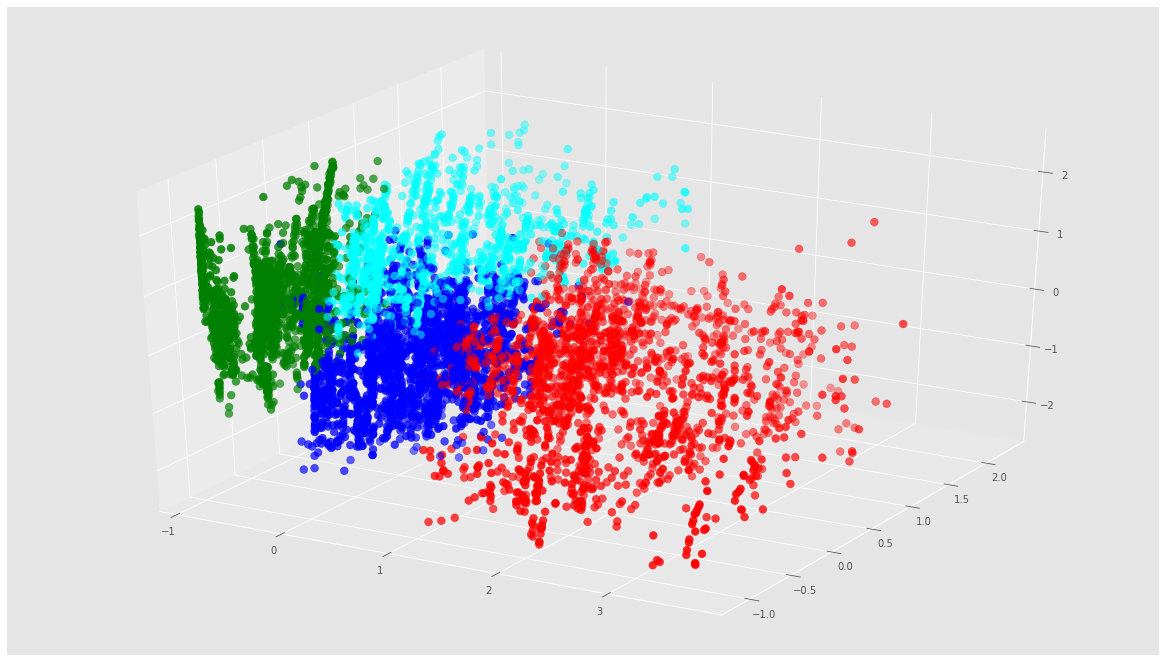

In [48]:
colores=['red','green','blue','cyan']
asignar=[]
for row in label:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)




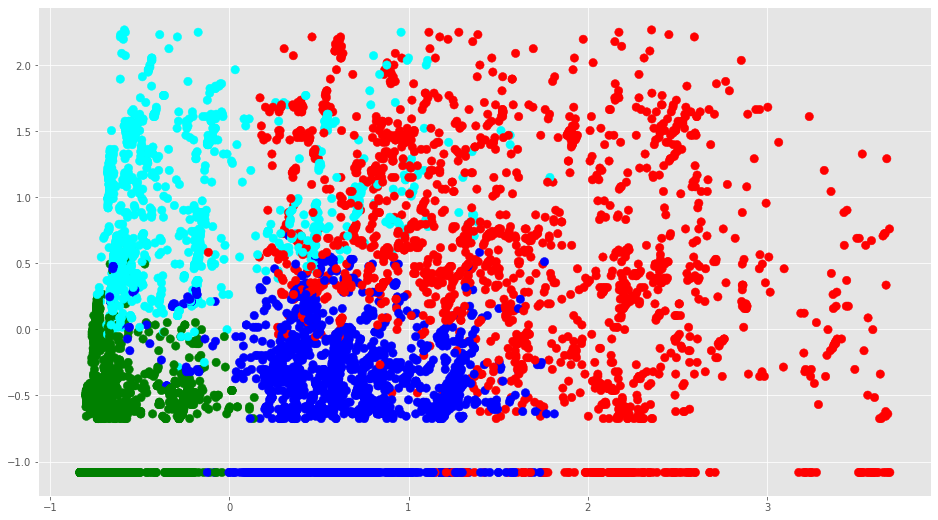

In [49]:
f1 = data['Global_active_power'].values
f2 = data['Global_reactive_power'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.show()

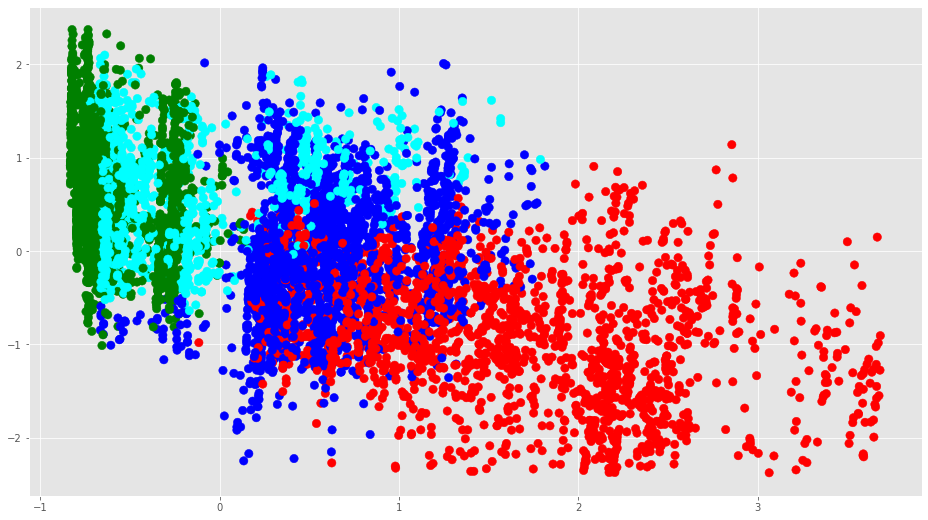

In [50]:
f1 = data['Global_active_power'].values
f2 = data['Voltage'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.show()

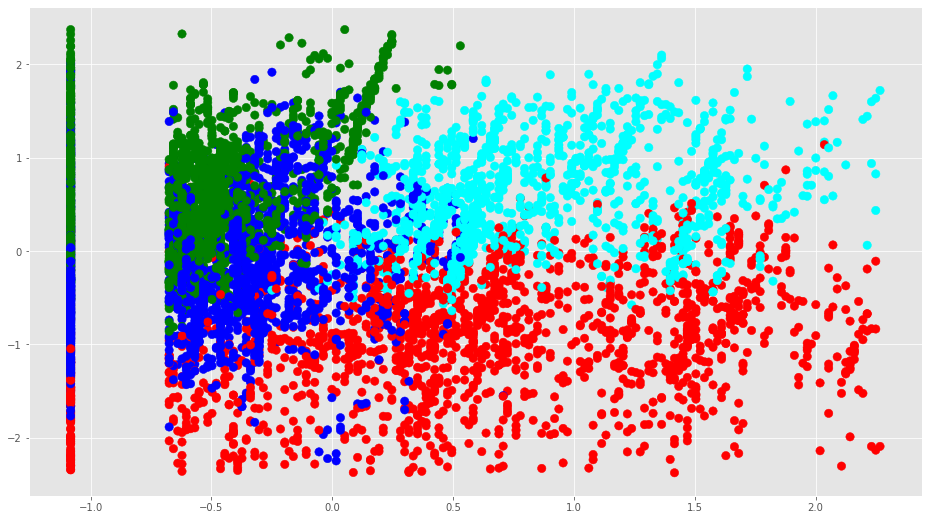

In [51]:
f1 = data['Global_reactive_power'].values
f2 = data['Voltage'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.show()

/home/katherine/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


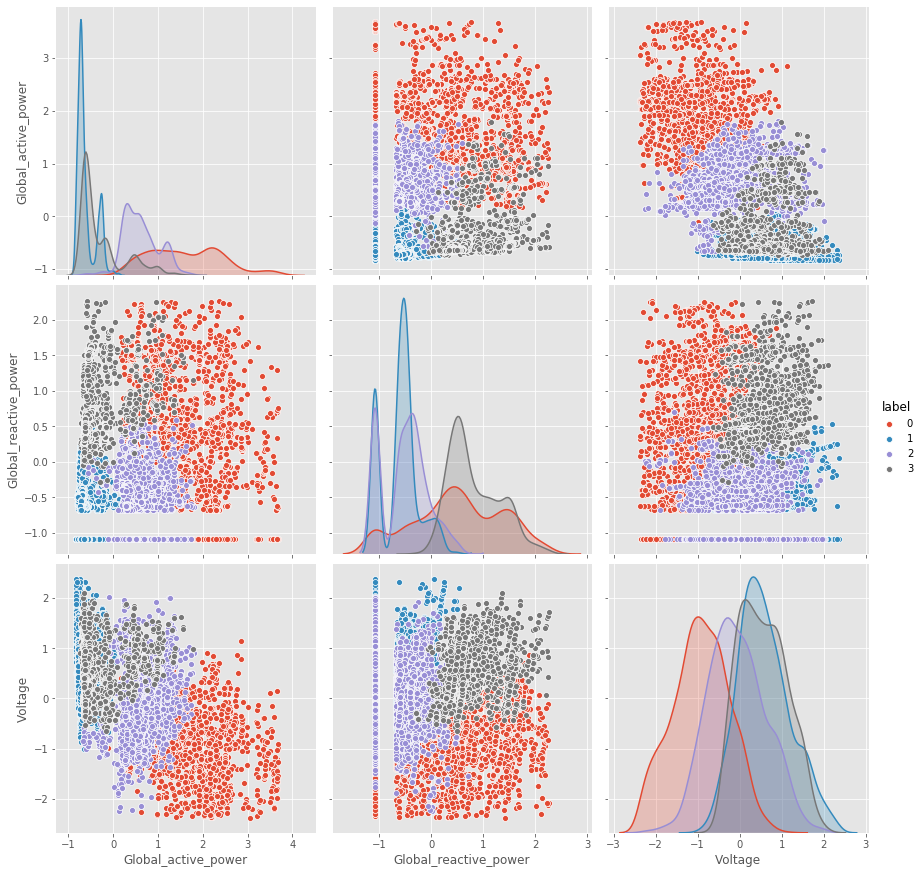

In [52]:
sb.pairplot(data.dropna(), hue='label',size=4,vars=["Global_active_power","Global_reactive_power","Voltage"],kind='scatter')

In [53]:
#data.groupby(['label','Año','Mes'])['label'].count()
data.groupby(['label'])['label'].count()

label
0    1814
1    2138
2    2265
3    1276
Name: label, dtype: int64

In [54]:
data.groupby(['label','Año','Mes'])['label'].count()

label  Año   Mes
0      2006  12      953
       2010  10      861
1      2006  12      454
       2010  10     1684
2      2006  12     1021
       2010  10     1244
3      2006  12      303
       2010  10      973
Name: label, dtype: int64

In [55]:
caracteristicas = data.groupby(['label'])["Global_active_power","Global_reactive_power","Voltage", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Horas", "Día", "Mes" ,"Año"].mean()
caracteristicas


/home/katherine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Global_active_power  Global_reactive_power   Voltage  Sub_metering_1  \
label                                                                         
0                 1.624077               0.508252 -0.918226        0.605680   
1                -0.605021              -0.596938  0.592992       -0.179701   
2                 0.621154              -0.509407 -0.056743       -0.104342   
3                -0.263782               0.827468  0.560531       -0.160523   

       Sub_metering_2  Sub_metering_3      Horas        Día        Mes  \
label                                                                    
0            0.226229        1.033310  14.205623  10.567255  11.050717   
1           -0.173883       -0.692363   8.156221   6.460711  10.424696   
2           -0.127884        0.806926  12.057837   9.704194  10.901545   
3           -0.070846       -0.329765   9.561129   6.662226  10.474922   

               Año  
label               
0      2007.898567  
1      2009.150608  
2      2008.196909  
3      2009.050157

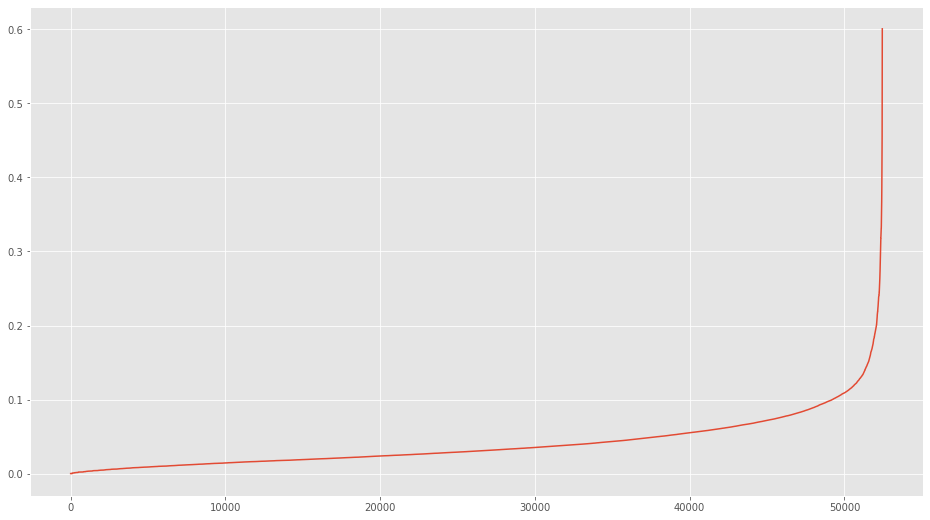

In [57]:
#MÉTODO DBSCAN
#Para calcular el radio y los n vecinos que necesito para clasificar los datos como puntos core o no, entonces
#usaré la curva elbow en DBSCAN

from sklearn.decomposition import PCA
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import DBSCAN

X = np.array(data[["Global_active_power","Global_reactive_power","Voltage"]])
## Parametrización de DBSCAN.
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(X)
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(X_pca)
minPts  = 7 # Fijamos el parámetro minPts
A = kneighbors_graph(X_pca, minPts, include_self=False)
Ar = A.toarray()
seq = []
for i,s in enumerate(X_pca):
    for j in range(len(X_pca)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
seq.sort()
plt.plot(seq)
plt.show()




In [69]:
#De forma aproximada entonces se determina que el radio será de 0.1 con n=7 vecinos más cercanos

dbscan = DBSCAN(eps=0.01, min_samples = 7, metric = "euclidean").fit(X)
clusters = dbscan.fit_predict(X)
data['label'] = clusters
data

Global_active_power  Global_reactive_power   Voltage  Sub_metering_1  \
15                  2.182963               1.416273 -1.150395       -0.181154   
16                  2.074920               0.264358 -1.277730       -0.181154   
17                  2.226559               0.299801 -1.175241       -0.181154   
18                  2.071129              -1.082497 -1.153501       -0.181154   
19                  2.508987              -1.082497 -1.554139       -0.181154   
...                      ...                    ...       ...             ...   
1999995             0.522512               0.122584 -0.023018       -0.181154   
1999996             0.480811              -0.054634 -0.917466       -0.181154   
1999997             0.490289              -0.036912 -0.737334       -0.181154   
1999998             0.509244               0.016253 -0.128613       -0.181154   
1999999             0.505453               0.016253 -0.243525       -0.181154   

         Sub_metering_2  Sub_metering_3  Horas  Segundos  Milisegundos  Día  \
15            -0.221566        1.262337     17        39             0   16   
16            -0.221566        1.262337     17        40             0   16   
17            -0.221566        1.262337     17        41             0   16   
18            -0.221566        1.381174     17        42             0   16   
19            -0.221566        1.262337     17        43             0   16   
...                 ...             ...    ...       ...           ...  ...   
1999995       -0.048773        1.500012     14        39             0    5   
1999996        0.124020        1.381174     14        40             0    5   
1999997       -0.048773        1.381174     14        41             0    5   
1999998       -0.048773        1.381174     14        42             0    5   
1999999       -0.048773        1.381174     14        43             0    5   

         Mes   Año  label  
15        12  2006     -1  
16        12  2006     -1  
17        12  2006     -1  
18        12  2006     -1  
19        12  2006     -1  
...      ...   ...    ...  
1999995   10  2010     -1  
1999996   10  2010     -1  
1999997   10  2010     -1  
1999998   10  2010     -1  
1999999   10  2010     -1  

[7493 rows x 13 columns]

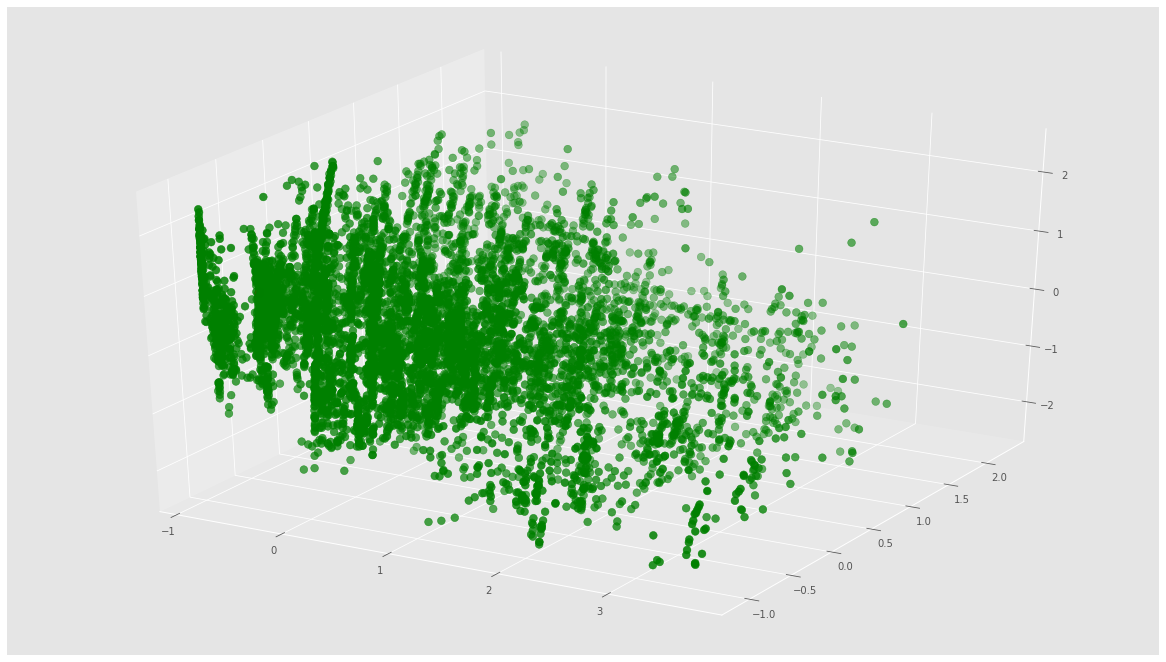

In [72]:
colores=['red','green']
asignar=[]

for row in clusters:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)


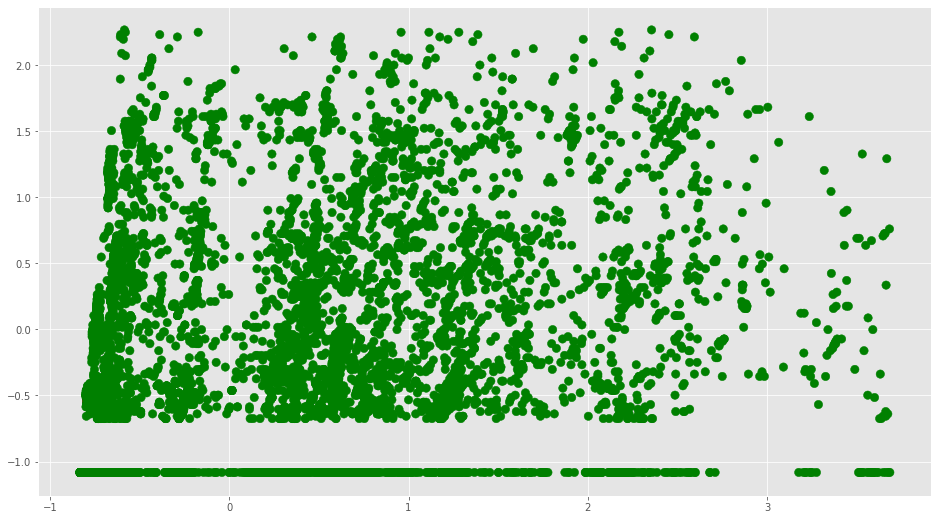

In [73]:
f1 = data['Global_active_power'].values
f2 = data['Global_reactive_power'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.show()

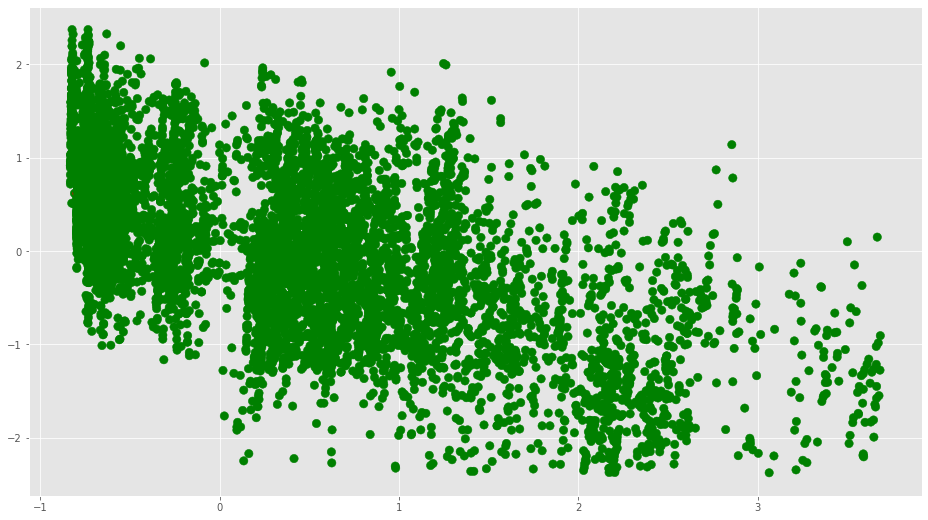

In [74]:
f1 = data['Global_active_power'].values
f2 = data['Voltage'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.show()

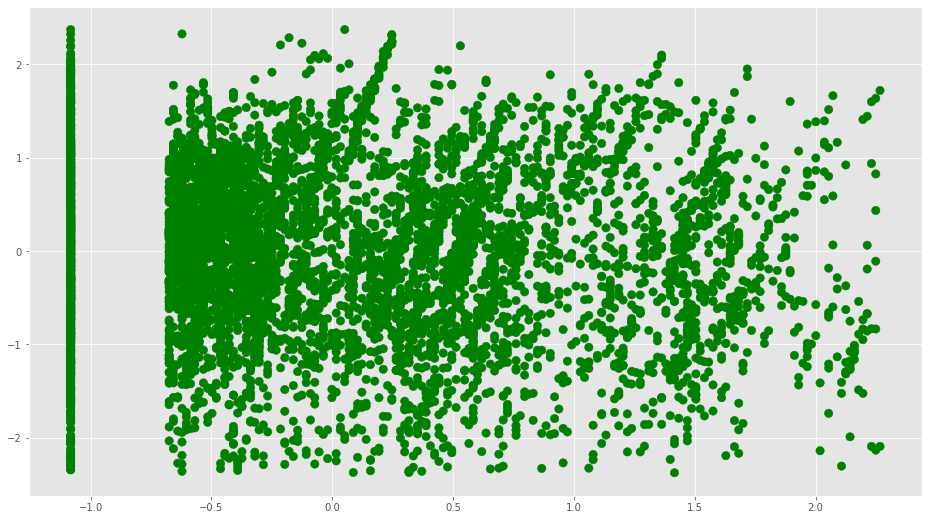

In [75]:
f1 = data['Global_reactive_power'].values
f2 = data['Voltage'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.show()

/home/katherine/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/katherine/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


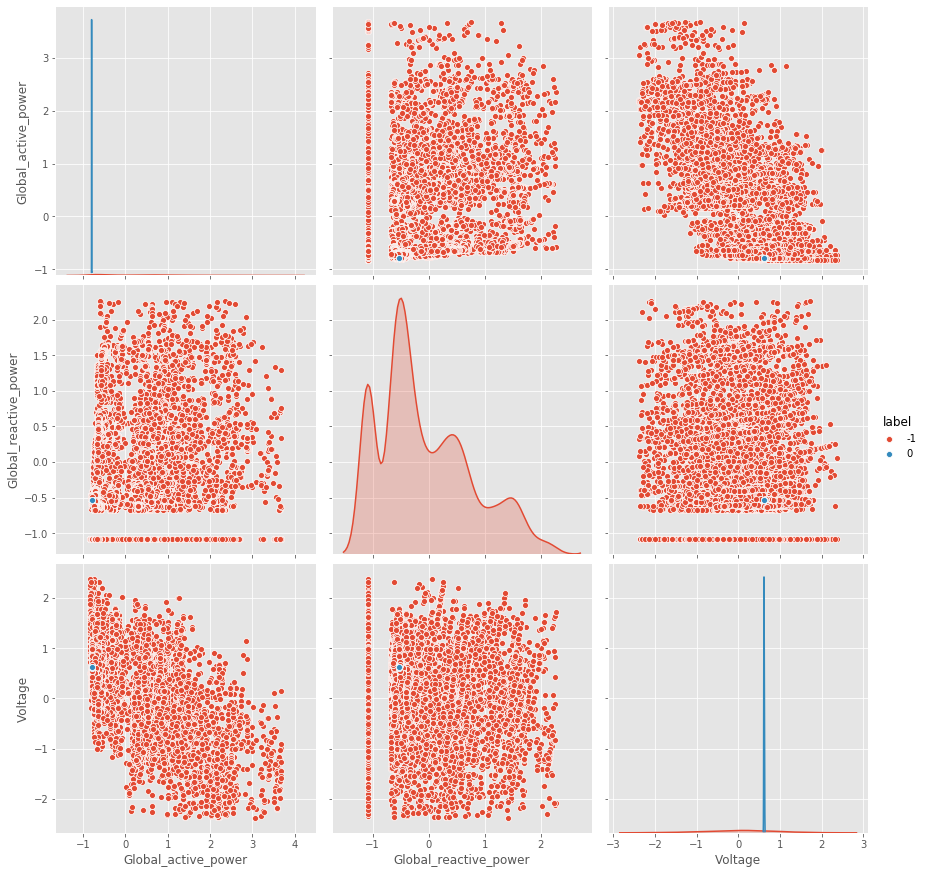

In [76]:
sb.pairplot(data.dropna(), hue='label',size=4,vars=["Global_active_power","Global_reactive_power","Voltage"],kind='scatter')

In [65]:
data.groupby(['label'])['label'].count()

label
-1    7485
 0       8
Name: label, dtype: int64

In [64]:
data.groupby(['label','Año'])['label'].count()

label  Año 
-1     2006    2731
       2010    4754
 0     2010       8
Name: label, dtype: int64

In [66]:
caracteristicas = data.groupby(['label'])["Global_active_power","Global_reactive_power","Voltage", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Horas", "Día", "Mes" ,"Año"].mean()
caracteristicas

/home/katherine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Global_active_power  Global_reactive_power   Voltage  Sub_metering_1  \
label                                                                         
-1                0.364624              -0.059850  0.024571        0.036712   
 0               -0.793196              -0.533122  0.619866       -0.181154   

       Sub_metering_2  Sub_metering_3      Horas       Día        Mes  \
label                                                                   
-1          -0.045380        0.241353  11.045691  8.475484  10.729726   
 0          -0.221566       -0.683623   5.125000  3.000000  10.000000   

               Año  
label               
-1     2008.540548  
 0     2010.000000